In [7]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
voltage = 1484
area = math.pi * (12.7/(2*100))**2
epsilon0 = 8.85418782*(10**-12)

distance_m = np.array([5.96, 4.96, 3.96, 2.96, 1.96, 0.96, 1.46, 2.46])/1000

#distance_m = [d/1000 for d in [5.96, 4.96, 3.96, 2.96, 1.96, 1.46, 2.46]]
distance_squared_m2 = distance_m ** -2

measured_mass_kg = np.array([0.31, 0.49, 0.8, 1.42, 3.65, 22.3, 7.31, 2.35])/1000

#measured_mass_kg = [m/1000 for m in [0.31, 0.49, 0.8, 1.42, 3.65, 7.31, 2.35]]
measured_force_N = measured_mass_kg * 9.80665
measured_force_uncertainties = [0.01 for i in range(len(measured_force_N))]

expected_force_N = (area * epsilon0 * (voltage**2))/(2 * (distance_m **2))

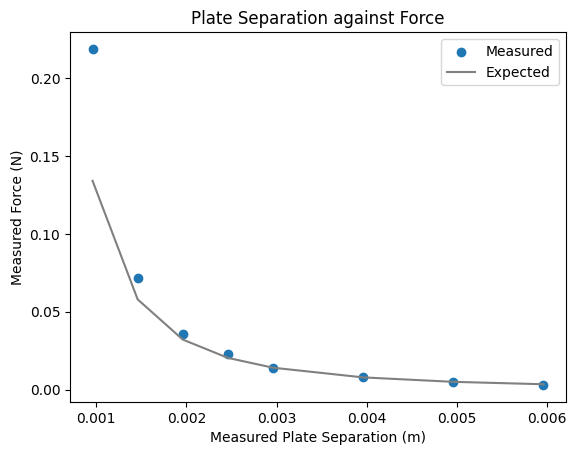

In [9]:
plt.title("Plate Separation against Force")
plt.xlabel("Measured Plate Separation (m)")
plt.ylabel("Measured Force (N)")

plt.scatter(distance_m, measured_force_N, label="Measured")

order = np.argsort(distance_m)
plt.plot(np.array(distance_m)[order], np.array(expected_force_N)[order], color="grey", label="Expected")

plt.legend()

plt.show()

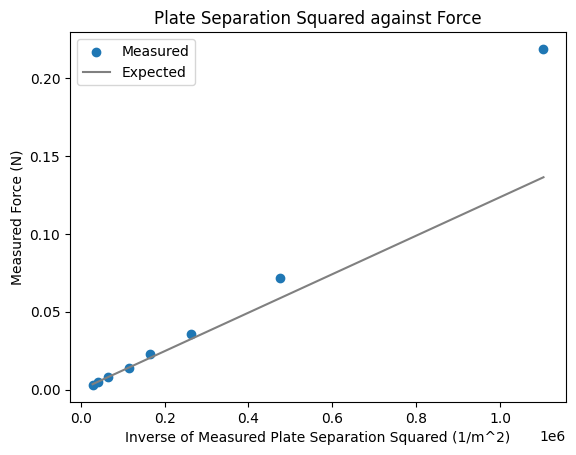

In [5]:
plt.title("Plate Separation Squared against Force")
plt.xlabel("Inverse of Measured Plate Separation Squared (1/m^2)")
plt.ylabel("Measured Force (N)")

plt.scatter(distance_squared_m2, measured_force_N, label="Measured")

order = np.argsort(distance_m)
plt.plot(np.array(distance_squared_m2)[order], np.array(expected_force_N)[order], color="grey", label="Expected")

plt.legend()

plt.show()

Fit to function y = A*X + B
Fit Result:
A =  1.9933813237789855e-07 +- 8.484279747826503e-09
B =  -0.008832708407582634 +- 0.003746349608481779


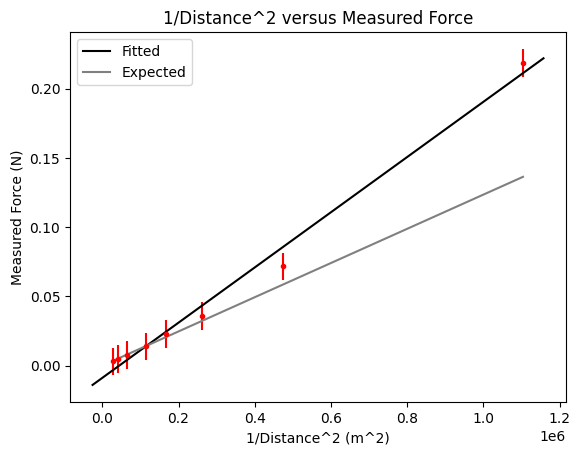

In [6]:
# Polyfit returns the values of the parameters corresponding to the best fit to the data.
fit_parameters = np.polyfit(distance_squared_m2, measured_force_N, 1)

# Print out the functional form that was fitted so that it is clear to the user how the fit parameters were defined.
print("Fit to function y = A*X + B")
print("Fit Result:")
try:
    # Call the polyfit routine a second time, this time we tell it to return the covariance matrix
    # which contains the uncertainties on the best fit values.
    cov = np.polyfit(distance_squared_m2, measured_force_N, 1 , cov=True)[1]
    unc = [np.sqrt(cov[i,i]) for i in range(len(cov))]
    # Print out the best fit parameters and their uncertainties.
    print("A = ",fit_parameters[0],"+-",unc[0])
    print("B = ",fit_parameters[1],"+-",unc[1])
# If the polyfit routine encountered an error while trying to fit the data, return the fit parameters and a statement
# indicating that there was a problem with the fit.
except ValueError:
    print("A = ",fit_parameters[0])
    print("B = ",fit_parameters[1])
    print("Not enough data points to find fit uncertainties")

# Create a new plot object and call it ax.
ax = plt.axes()

# Create an array of x-axis values to be used in calculating the best fit y-axis values.
# The linspace command generated an array of integer values between the values determined by the "min" and "max" commands.
# Min and max scan the array you send it to find the minimum and maximum values in the array.
# In order to provide a little bit of visual space at the beginning and end of the plot, we calculate
# 20% of the full range of data on the x-axis and extend the range of the best fit x-axis data by this amount
# at both ends.
padding = (max(distance_squared_m2) - min(distance_squared_m2))/20
Fit_line_x = np.linspace(min(distance_squared_m2)-padding, max(distance_squared_m2)+padding)

# Change the plot title and axes labels as appropriate for the data you are plotting.
ax.set_title('1/Distance^2 versus Measured Force')
ax.set_xlabel('1/Distance^2 (m^2)')
ax.set_ylabel('Measured Force (N)')

# The command "errorbar" creates an xy plot with errorbars on the y-axis.
# The "fmt" parameter is used to make the points for the data red (r) and use a dot (.) for the marker.
ax.errorbar(distance_squared_m2, measured_force_N, measured_force_uncertainties, fmt='r.')

# Plot the best fit line.  Note how we use the best fit parameters returned by the polyfit routine to 
# calculate the y-axis values for each point along the x-axis.  
# For whatever reason when using the "plot" command the color and line type are set with out using "fmt =".
# Just use the specifier for the line color (k) for black and line type (-) for a solit line.
ax.plot(Fit_line_x, fit_parameters[1]+Fit_line_x*fit_parameters[0],'k-', label="Fitted")

order = np.argsort(distance_m)
plt.plot(np.array(distance_squared_m2)[order], np.array(expected_force_N)[order], color="grey", label="Expected")

plt.legend()

# Now go ahead and display the plot.
plt.show()